In [1]:
import matplotlib.pyplot as plt
import scipy.io
import helper_functions.helper_functions as helper

# Change this to GPU or CPU depending on your machine
%run fista_spectral_cupy.py GPU

device =  GPU , using GPU and cupy


In [2]:
if device == 'GPU':
    import cupy as np
    np.cuda.Device(2).use()
else:
    import numpy as np

## Load in calibration data and image

In [3]:
loaded_mat = scipy.io.loadmat('SampleData/calibration.mat')
img = plt.imread('SampleData/meas_thordog.png')

In [4]:
mask, psf, img = helper.preprocess(loaded_mat['mask'], loaded_mat['psf'], img)

In [5]:
# Place variables on GPU if using GPU
if device == 'GPU': 
    mask = np.asarray(mask)
    psf = np.asarray(psf)
    img = np.asarray(img)
    

## Setup FISTA Algorithm

In [6]:
fista = fista_spectral_numpy(psf, mask[:,:,0:-1])

In [7]:
fista.iters = 500

# Default: tv, Options: 'native' for native sparsity, 'non-neg' for enforcing non-negativity only
fista.prox_method = 'tv'  
fista.tv_lambda  = .003
fista.tv_lambdaw = 0.01 
fista.lowrank_lambda = 0.00005

iteration:  0  loss:  1310.1492105194563


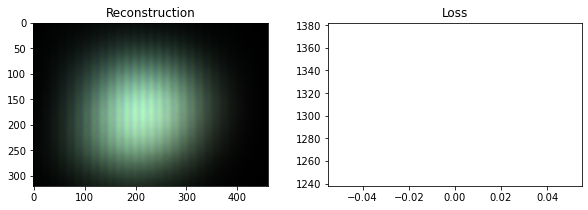

iteration:  20  loss:  121.09960628006749


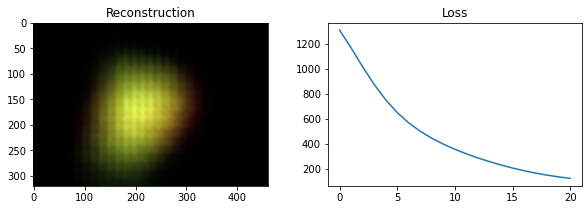

iteration:  40  loss:  39.20328828890162


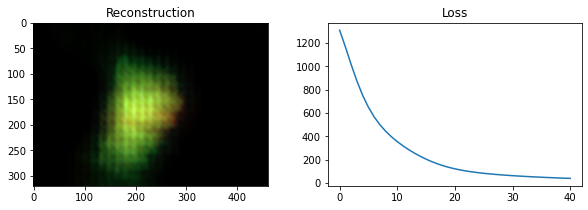

iteration:  60  loss:  20.69703848592345


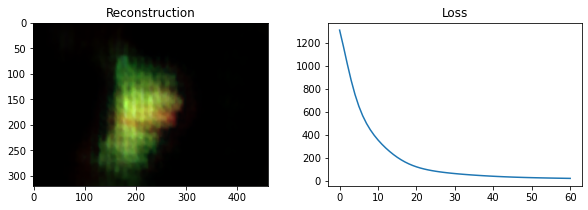

iteration:  80  loss:  13.70267492021555


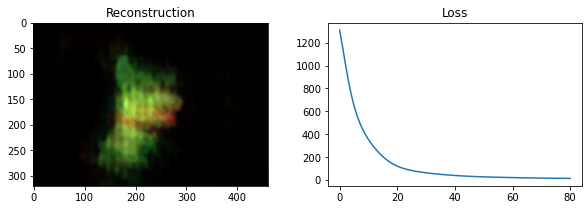

iteration:  100  loss:  10.581785638259575


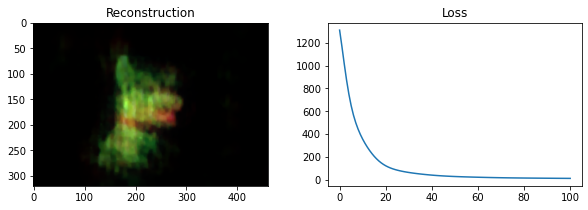

iteration:  120  loss:  9.176715812189174


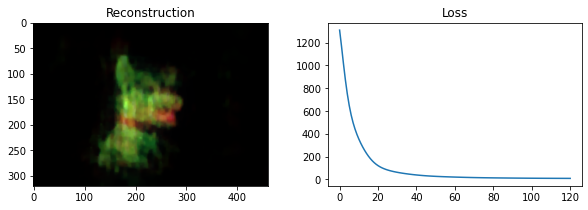

iteration:  140  loss:  8.396805581412654


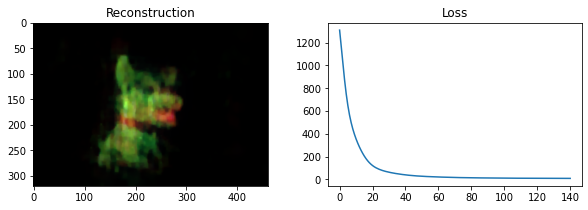

iteration:  160  loss:  7.802746900611769


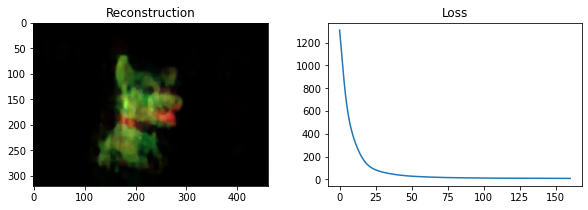

iteration:  180  loss:  7.3400945660811265


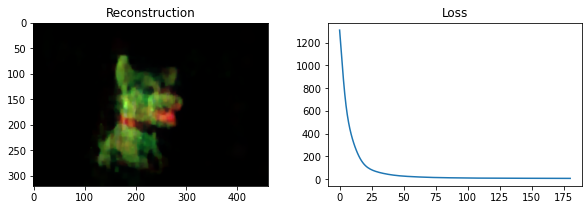

iteration:  200  loss:  6.994996071570795


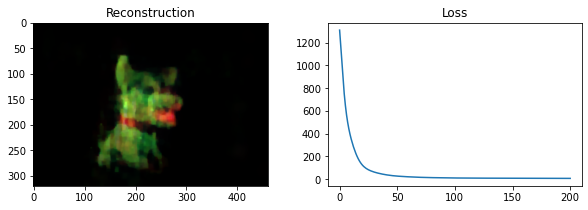

iteration:  220  loss:  6.75116477714505


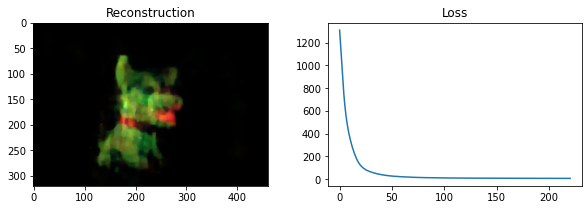

iteration:  240  loss:  6.555072992291206


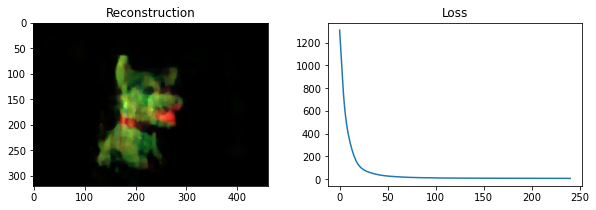

iteration:  260  loss:  6.386506657932553


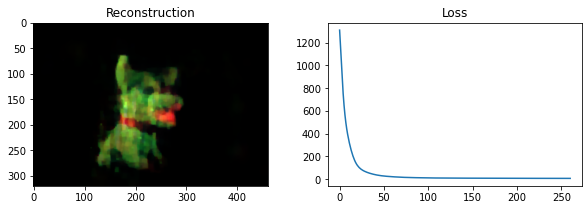

iteration:  280  loss:  6.242608151805789


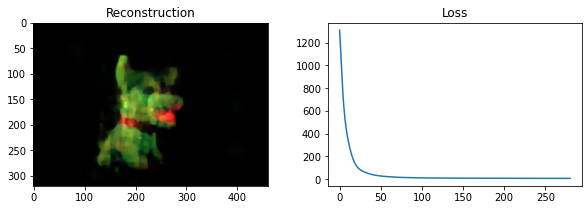

iteration:  300  loss:  6.12735226096711


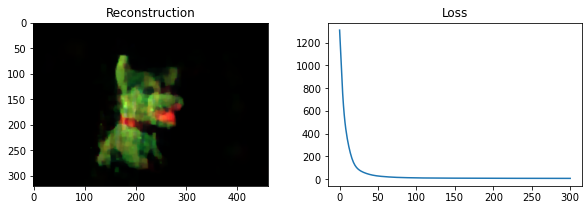

iteration:  320  loss:  6.039711669867932


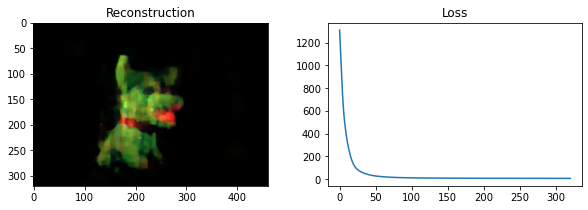

iteration:  340  loss:  5.971301981174671


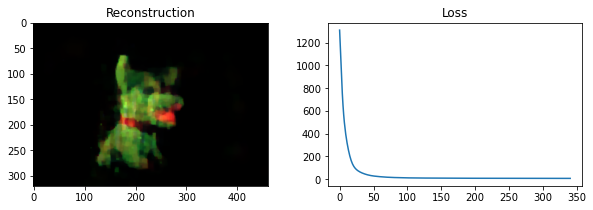

iteration:  360  loss:  5.91327622068727


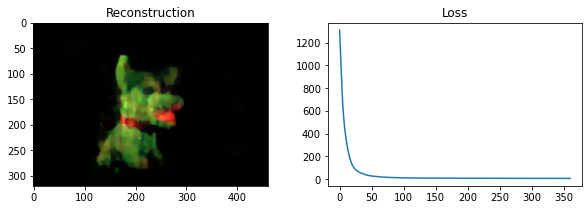

iteration:  380  loss:  5.861982956174207


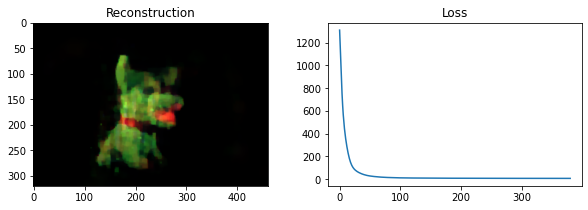

iteration:  400  loss:  5.817647058395376


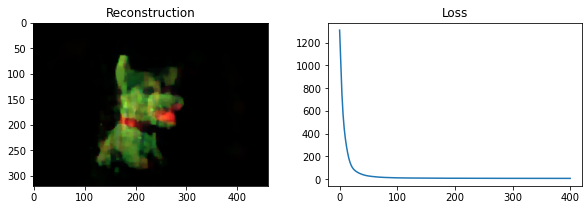

iteration:  420  loss:  5.780504096123991


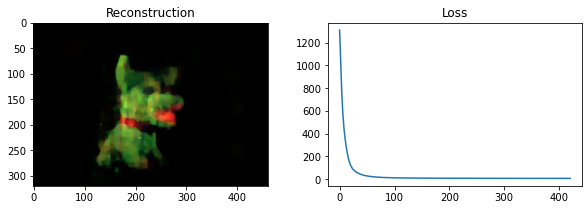

iteration:  440  loss:  5.749139554594435


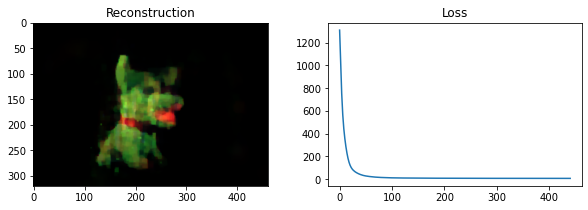

iteration:  460  loss:  5.721972380179291


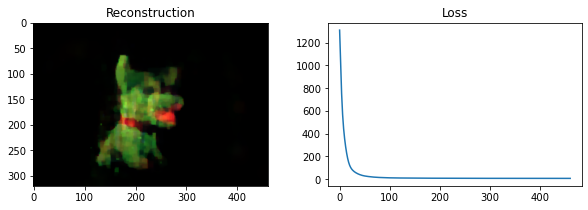

iteration:  480  loss:  5.69775805554416


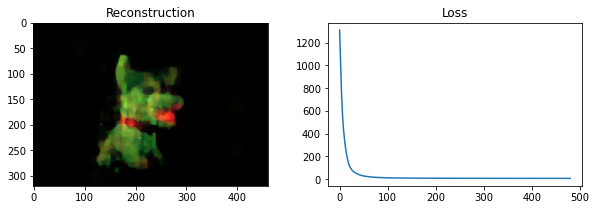

In [8]:
out_img = fista.run(img)

In [9]:
out_img = fista.out_img
fc_img = helper.pre_plot(helper.stack_rgb_opt(out_img))


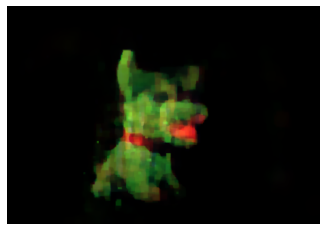

In [10]:
plt.imshow(fc_img); plt.axis('off');

In [11]:
helper.plt3D(helper.pre_plot(out_img))

interactive(children=(IntSlider(value=1, description='r', max=63), Output()), _dom_classes=('widget-interact',…